# Examen Final: Módulo 2

# Parte 1: Preguntas teóricas


**Si tu modelo tiene un buen performance en el set de datos de entrenamiento pero no generaliza adecuadamentea nuevas observaciones, ¿Qué podría estar pasando? Nombre al menos dos posibles soluciones** \\
**R:** Nuestro modelo puede estar presentando sobre-ajuste sobre los datos de entrenamiento, esto quiere decir que está capturando el ruido o "memorizando" el set de entrenamiento.
Existen posibles soluciones, una de ellas puede ser reducir la complejidad del modelo, por ejemplo, si se tiene un arbol de regresion, podriamos intentar con reduciendo la profundidad del arbol.
Una segunda segunda opcion es usar un modelo con termino de regularización, por ejemplo una regresión Ridge o Lasso, que tienen terminos que atacan ese problema intentando reducir la varianza a costa de aumentar un poco el sesgo del modelo.

**Para un ensamble de modelos ¿Cuál es la diferencia entre votación dura y suave?** \\
**R:** En la votación dura se considerará la clase más votadas por cada uno de los modelos de nuestro ensamble. En la votación suave nos interesa la probabilidad de pertenecer a cada clase y esta se obtiene como el promedio de las probabilidades que nos arrojan cada uno de los modelos del ensamble.

**¿Qué hace que los ensambles llamados Extra-trees tengan más elementos aleatorios que un bosque aleatorio?¿Qué beneficios tienen estos elementos aleatorios extra? ¿Qué modelo es más rápido de ejecutar, un Extra-tree oun bosque aleatorio?** \\
**R:** Además de usar un subconjunto aleatorio de features, se selecciona un threshold aleatorio para cada feature, este es el elemento que añade más aleatoriedad al modelo. Entre sus beneficios se encuentra que reduce la varianza del modelo, por ende este generaliza de mejor manera. Por último, un extra-tree es más rápido de entrenar, ya que en este modelo los thresholds son aleatorios, lo cual es computacionalmente menos costoso a comparación de un Random Forest donde cada threshold se calcula de tal manera que reduzca la medida de impureza.

**¿Cuál es la idea fundamental detrás de un modelo de máquina de soporte vectorial?** \\
**R:** Consiste en encontrar un hiperplano optimo de separación entre las clases que se están clasificando, y encontrar el margen que nos permita tener un bune desempeño en la validación. Esto es para problemas linealmente separables y en caso de tener un problema linealmente no separable, podemos usar el truco del Kernel, el cual nos permite realizar un tranformación de nuestro espacio a un espacio de dimensión mayor donde nuestro problema sí sea separable.

**¿A qué llamamos vector de soporte?** \\
**R:** Son los vectores que se encuentran justo en los límites de nuestro margen de desición, y son los que definen los limites de la región de desición. 

**Suponga que está utilizando un modelo de regresión lineal con un set de datos aumentado utilizando un polinomio de grado M. Graficas las curvas de aprendizaje y notas un gran gap entre la curva de error en el set de entrenamiento y la curva de error en el set de validación. ¿Qué está pasando? Menciona al menos dos soluciones** \\
**R:** Si hay una gran separación, lo que sucede es que el error en el set de entrenamiento y el error en el set de prueba son muy distintos. Esto nos indica que probablemente hay un problema de sobreajuste, el modelo está "memorizando" el dataset de entrenamiento y por ese motivo no puede generalizar correctamente nuevas observaciones. Una posible solución es reducir la complejidad del modelo, en este caso reducir el grado del polinomio, y volver a evaluar las metricas de desempeño en train y test. Otra posible solución es realizar una limpieza de datos más exhaustiva, intentando eliminar la mayor cantidad posible de ruido en los datos para que el modelo tenga un mejor deempeño.

**Suponga que está utilizando un modelo de regresión Ridge. Notas que el error en el set de entrenamiento es muy similar al error en el set de validación. Sin embargo, dicho error es elevado. ¿Dirías que el modelo sufre de alto sesgo o alta varianza? ¿Deberías de incrementar el valor del parámetro regularizador alfa o reducirlo?** \\
**R:** El modelo presenta alto sesgo, y a la vez de baja varianza, ya que estamos teniendo un modelo "malo" pues nuestro error es elevado, pero es consistentemente malo, pues tanto en training como en test tenemos errores parecidos. Lo que podemos hacer es disminuir el parametro de regularización ya que esto nos permitirá disminuir el sesgo de nuestro modelo a costa de incrementar la varianza. 

**¿Por qué sería mejor usar?
Una regresión Ridge en lugar de una regresión lineal simple
Una regresión Lasso en lugar de una regresión Ridge
Una red elástica en lugar de una regresión Lasso** \\
**R:** Al usar un regresión Ridge en vez de una regresión lineal simple, se tiene la ventaja de contar con un parámetro para evitar el sobreajuste de los datos, este parámetro lo podemos optimizar y así obtener un modelo que mejor haga la compensación entre sesgo y varianza. \\
Al usar una regresión Lasso en vez de una Ridge se tiene la ventaja de que con Lasso los coeficientes de las variables menos relevantes se van a hacer ceros, por lo cual nos ayuda a seleccionar la variables de mayor importancia y a reducir la dimensión, además de ayudarnos a interpretar de mejor manera nuestro modelo. \\
Finalmente, la ventaja de usar un Red Elástica en vez de Lasso es que tiene las bondades de Lasso como por ejemplo llevar a cero los coeficientes de las variables de poca importancia, además de que permite lidiar con data sets donde el numero de observaciones es menor que el numero de variables.

**Si un árbol de decisión presenta sobreajuste de datos, ¿Es una buena idea intentar decrementar el valor del parámetro max_depth (Piensa que estás utilizando el modelo de la librería Sklearn)?** \\
**R:** Asi es, si el parametro de profundidad del arbol es demasiado grande, significa que el arbol tiene demasiados niveles y puede ser contraproducente ya que se está memorizando ejemplos específicos en el dataset de entrenamiento. Por lo cual podriamos intentar optimizar ese parametro usando validación cruzada.


# Parte 2: Práctica



## **A) Entendimiento del problema de negocio y de los datos**

En esta estapa del proceso CRISP-DM se realiza el entendimiento de los problemas del negocio, de los datos con los que se cuenta y sus fuentes, se define qué problema se quiere resolver, y finalmente cuales son las expectativas de nuestro proyecto. \\
La compañia Star S.A. es una compañia dedicada a los servicio financieros, entre los servicios que ofrece la compañia se encuentra una aplicación para realizar operaciones en banca móvil. Como en muchas área de la empresa, siempre se busca estar en un proceso de mejora contínua, por lo cual el área de operaciones de la compañia tiene un proyecto para mejorar el servicio a los clientes que requieren atención a sus dudas relacionados con su servicio de banca móvil. Como en este momento el proyecto se encuentra en una prueba piloto, las llamadas de los clientes se pueden clasificar en dos principales tópicos: "tranferencias" y "token". Una vez hecha esta clasificación, se pueden redireccionar con el equipo de atención a clientes especializado en ese tópico. Los datos con los que se cuenta es un dataset en formato csv con la fecha de la opinión del cliente, la opinión u comentario del cliente en formato texto, el número de "pulgares arriba" o reacciones que ha tenido el comentario y finalmente la clasificación a la que pertenece cada opinión. Por lo cual nuestro objetivo será clasificar de manera adecuada el tópico de cada una de las llamadas/opiniones para así asignarla al call center correpondiente. Se requiete también que nuestra solución  tenga un excelente desempeño ya que estará clasificando y asignando cada una de las llamadas en tiempo real. Los clientes son sumamente importantes para la compañia y atenderlos de manera oportuna y eficaz hará que permanezcan con nosotros. \\

Los datos con los que se cuenta tiene las siguientes columnas: \\
* "Unnamed: 0" Variable que contiene valores enteros. Sin embargo no es una llave primaria de esta tabla. Se procederá a eliminar en las etapas siguientes.
* "content" Variable que contiene una cadena de texto con el comentario del usuario.
* "reviewCreatedVersion" Variable que indica la versión de la aplicación que estaba usando el usuario.
* "thumbsUpCount" Variable que indica el número de pulgares arriba que recibió la opinión del usuario.
* "content" Variables duplicada. Contiene la misma información que la otra variabla también llamada "content".
* "topic" Variable objetivo, indica el tópico de la opinión, puede tomar dos valores: tranferencias o token. 

## **B) Exploración de datos**

Para esta etapa realizamos una exploración en los datos, la dimensión de nuestra matriz de datos, sus atributos, los tipos de atributos, la proporción de registros de cada tópico y su comportamiento a través del tiempo.

In [3]:
# Import useful libraries
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
from scipy import stats
import re
import pandas as pd
import numpy as np
from numpy import zeros
from numpy import asarray
from numpy import array
import itertools
import collections
import csv
# Tunning plots
import matplotlib.lines as mlines
from matplotlib.ticker import MaxNLocator
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline
pd.set_option('display.max_columns', 100)
SEED = 15432
# scikit-learn
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge,RidgeCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score

In [4]:
data = pd.read_csv("data_app_movil.csv")
data.head(2)

,Unnamed: 0,at,content,reviewCreatedVersion,thumbsUpCount,content.1,topic
0,6,2021-09-22 23:45:00,"Que paso con la app, al abrir se cierra despué...",5.62,217,"Que paso con la app, al abrir se cierra despué...",transferencias
1,9,2021-03-21 17:26:06,"No funciona, después de más de una hora entre ...",5.59,201,"No funciona, después de más de una hora entre ...",transferencias


In [5]:
#Obtener la dimensión de dataframe
print("Filas:",data.shape[0])
print("Columnas:",data.shape[1])

Filas: 7466
Columnas: 7


In [6]:
#Nombre de las variables
print(data.columns.values.reshape(-1,1))

[['Unnamed: 0']
 ['at']
 ['content']
 ['reviewCreatedVersion']
 ['thumbsUpCount']
 ['content.1']
 ['topic']]


In [7]:
# Valores únicos de la variable objetivo
print(data["topic"].unique().reshape(-1,1),"\n\n\n")

# Porcentaje de cada topico
print(100*data["topic"].value_counts(1),"\n\n\n")

# Rango de fechas de los comentarios
data["at"] = pd.to_datetime(data["at"],format="%Y-%m-%d %H:%M:%S")
print("Fecha máxima:",data["at"].max())
print("Fecha mínima:",data["at"].min())

[['transferencias']
 ['token']] 



transferencias    62.148406
token             37.851594
Name: topic, dtype: float64 



Fecha máxima: 2021-10-22 23:16:15
Fecha mínima: 2020-08-08 01:52:32


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


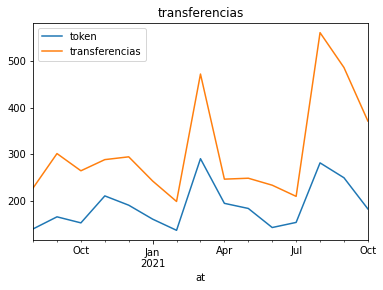

In [8]:
# Grafica de Numero de comentarios por mes, desglosado por topico
data["at"] = pd.to_datetime(data["at"],format="%Y-%m-%d %H:%M:%S")
a = pd.merge(data,pd.get_dummies(data["topic"]),left_index=True,right_index=True).groupby("at")["token","transferencias"].sum()
a = a.groupby(pd.Grouper(freq="M"))
a = a.sum()

import matplotlib.pyplot as plt
a["token"].plot(title="token",legend="token")
a["transferencias"].plot(title="transferencias",legend="transferencias")
plt.show()

In [9]:
# Comentario con más pulgares arriba
print(data.sort_values(by="thumbsUpCount",ascending=False).head(1)[["content","topic"]])

                                             content           topic
0  Que paso con la app, al abrir se cierra despué...  transferencias


In [10]:
# Número promedio de pulgares arriba, desglosado por topico
data.groupby("topic")["thumbsUpCount"].mean()

topic
token             1.759023
transferencias    1.620259
Name: thumbsUpCount, dtype: float64

## **C) Preprocesamiento de datos**

Como vimos en la tarea, para poder alimentar un modelo de aprendizaje de máquina para clasificación de texto, es necesario realizar como primera etapa la limpieza del texto. Entre las tareas que se deben realizar están las siguientes: eliminar acentos, caracteres especiales, signos de puntuación, convertir minusculas a mayusculas, eliminar las palabras que no aportan información (stop words) entre otras tareas.

In [11]:
# Importación de librearías.
import nltk
import spacy
from spacy.lang.es import Spanish
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import itertools
import collections
import csv
!pip install unidecode
import unidecode

nlp = Spanish()
import nltk
nltk.download('stopwords')

stop_words = list(set(stopwords.words('spanish')))

stop_words.append('aplicacion');stop_words.append('banco')
stop_words.append('a');
stop_words.append('actualmente');
stop_words.append('acuerdo');
stop_words.append('adelante');
stop_words.append('ademas');
stop_words.append('ademas');
stop_words.append('adrede');
stop_words.append('afirmo');
stop_words.append('agrego');
stop_words.append('ahi');
stop_words.append('ahora');
stop_words.append('ahi');
stop_words.append('al');
stop_words.append('algo');
stop_words.append('alguna');
stop_words.append('algunas');
stop_words.append('alguno');
stop_words.append('algunos');
stop_words.append('algun');
stop_words.append('alli');
stop_words.append('alli');
stop_words.append('alrededor');
stop_words.append('ambos');
stop_words.append('ampleamos');
stop_words.append('antano');
stop_words.append('antaño');
stop_words.append('ante');
stop_words.append('anterior');
stop_words.append('antes');
stop_words.append('aproximadamente');
stop_words.append('aquel');
stop_words.append('aquella');
stop_words.append('aquellas');
stop_words.append('aquello');
stop_words.append('aquellos');
stop_words.append('aqui');
stop_words.append('aquel');
stop_words.append('aquella');
stop_words.append('aquellas');
stop_words.append('aquellos');
stop_words.append('aqui');
stop_words.append('arriba');
stop_words.append('arribaabajo');
stop_words.append('asi');
stop_words.append('asi');
stop_words.append('atras');
stop_words.append('aun');
stop_words.append('aunque');
stop_words.append('ayer');
stop_words.append('aun');
stop_words.append('b');
stop_words.append('breve');
stop_words.append('c');
stop_words.append('cada');
stop_words.append('casi');
stop_words.append('cerca');
stop_words.append('cierta');
stop_words.append('ciertas');
stop_words.append('cierto');
stop_words.append('ciertos');
stop_words.append('cinco');
stop_words.append('claro');
stop_words.append('comento');
stop_words.append('como');
stop_words.append('con');
stop_words.append('conmigo');
stop_words.append('conocer');
stop_words.append('conseguimos');
stop_words.append('conseguir');
stop_words.append('considera');
stop_words.append('considero');
stop_words.append('consigo');
stop_words.append('consigue');
stop_words.append('consiguen');
stop_words.append('consigues');
stop_words.append('contigo');
stop_words.append('contra');
stop_words.append('cosas');
stop_words.append('creo');
stop_words.append('cual');
stop_words.append('cuales');
stop_words.append('cualquier');
stop_words.append('cuando');
stop_words.append('cuanta');
stop_words.append('cuantas');
stop_words.append('cuanto');
stop_words.append('cuantos');
stop_words.append('cuatro');
stop_words.append('cuenta');
stop_words.append('cual');
stop_words.append('cuales');
stop_words.append('cuando');
stop_words.append('cuanta');
stop_words.append('cuantas');
stop_words.append('cuanto');
stop_words.append('cuantos');
stop_words.append('como');
stop_words.append('d');
stop_words.append('da');
stop_words.append('dado');
stop_words.append('dan');
stop_words.append('dar');
stop_words.append('de');
stop_words.append('debajo');
stop_words.append('debe');
stop_words.append('deben');
stop_words.append('debido');
stop_words.append('decir');
stop_words.append('dejo');
stop_words.append('del');
stop_words.append('delante');
stop_words.append('demas');
stop_words.append('dentro');
stop_words.append('desde');
stop_words.append('despues');
stop_words.append('despues');
stop_words.append('detras');
stop_words.append('detras');
stop_words.append('dia');
stop_words.append('dias');
stop_words.append('dice');
stop_words.append('dicen');
stop_words.append('dicho');
stop_words.append('dieron');
stop_words.append('diferente');
stop_words.append('diferentes');
stop_words.append('dijeron');
stop_words.append('dijo');
stop_words.append('dio');
stop_words.append('donde');
stop_words.append('dos');
stop_words.append('durante');
stop_words.append('dia');
stop_words.append('dias');
stop_words.append('donde');
stop_words.append('e');
stop_words.append('ejemplo');
stop_words.append('el');
stop_words.append('ella');
stop_words.append('ellas');
stop_words.append('ello');
stop_words.append('ellos');
stop_words.append('embargo');
stop_words.append('emplean');
stop_words.append('emplear');
stop_words.append('empleas');
stop_words.append('empleo');
stop_words.append('en');
stop_words.append('encima');
stop_words.append('encuentra');
stop_words.append('enfrente');
stop_words.append('enseguida');
stop_words.append('entonces');
stop_words.append('entre');
stop_words.append('era');
stop_words.append('eramos');
stop_words.append('eran');
stop_words.append('eras');
stop_words.append('eres');
stop_words.append('es');
stop_words.append('esa');
stop_words.append('esas');
stop_words.append('ese');
stop_words.append('eso');
stop_words.append('esos');
stop_words.append('esta');
stop_words.append('estaba');
stop_words.append('estaban');
stop_words.append('estabas');
stop_words.append('estad');
stop_words.append('estada');
stop_words.append('estadas');
stop_words.append('estado');
stop_words.append('estados');
stop_words.append('estamos');
stop_words.append('estan');
stop_words.append('estando');
stop_words.append('estar');
stop_words.append('estaremos');
stop_words.append('estara');
stop_words.append('estaran');
stop_words.append('estaras');
stop_words.append('estare');
stop_words.append('estaria');
stop_words.append('estariamos');
stop_words.append('estarian');
stop_words.append('estas');
stop_words.append('este');
stop_words.append('estemos');
stop_words.append('esto');
stop_words.append('estos');
stop_words.append('estoy');
stop_words.append('estuve');
stop_words.append('estuviera');
stop_words.append('estuvieran');
stop_words.append('estuvieras');
stop_words.append('estuvieron');
stop_words.append('estuviese');
stop_words.append('estuviesen');
stop_words.append('estuvieses');
stop_words.append('estuvimos');
stop_words.append('estuviste');
stop_words.append('estuvieramos');
stop_words.append('estuviesemos');
stop_words.append('estuvo');
stop_words.append('esta');
stop_words.append('estabamos');
stop_words.append('estan');
stop_words.append('estas');
stop_words.append('este');
stop_words.append('esten');
stop_words.append('estes');
stop_words.append('ex');
stop_words.append('excepto');
stop_words.append('existe');
stop_words.append('existen');
stop_words.append('explico');
stop_words.append('expreso');
stop_words.append('f');
stop_words.append('fin');
stop_words.append('final');
stop_words.append('fue');
stop_words.append('fuera');
stop_words.append('fueran');
stop_words.append('fueras');
stop_words.append('fueron');
stop_words.append('fuese');
stop_words.append('fuesen');
stop_words.append('fueses');
stop_words.append('fui');
stop_words.append('fuimos');
stop_words.append('fuiste');
stop_words.append('fueramos');
stop_words.append('fuesemos');
stop_words.append('g');
stop_words.append('general');
stop_words.append('gran');
stop_words.append('grandes');
stop_words.append('gueno');
stop_words.append('h');
stop_words.append('ha');
stop_words.append('haber');
stop_words.append('habia');
stop_words.append('habida');
stop_words.append('habidas');
stop_words.append('habido');
stop_words.append('habidos');
stop_words.append('habiendo');
stop_words.append('habla');
stop_words.append('hablan');
stop_words.append('habremos');
stop_words.append('habra');
stop_words.append('habran');
stop_words.append('habras');
stop_words.append('habre');
stop_words.append('habreis');
stop_words.append('habria');
stop_words.append('habriamos');
stop_words.append('habrian');
stop_words.append('habrias');
stop_words.append('habia');
stop_words.append('habiamos');
stop_words.append('habian');
stop_words.append('habias');
stop_words.append('hace');
stop_words.append('hacemos');
stop_words.append('hacen');
stop_words.append('hacer');
stop_words.append('hacerlo');
stop_words.append('haces');
stop_words.append('hacia');
stop_words.append('haciendo');
stop_words.append('hago');
stop_words.append('han');
stop_words.append('has');
stop_words.append('hasta');
stop_words.append('hay');
stop_words.append('haya');
stop_words.append('hayamos');
stop_words.append('hayan');
stop_words.append('hayas');
stop_words.append('he');
stop_words.append('hecho');
stop_words.append('hemos');
stop_words.append('hicieron');
stop_words.append('hizo');
stop_words.append('horas');
stop_words.append('hoy');
stop_words.append('hube');
stop_words.append('hubieras');
stop_words.append('hubieron');
stop_words.append('hubiese');
stop_words.append('hubiesen');
stop_words.append('hubieses');
stop_words.append('hubimos');
stop_words.append('hubiste');
stop_words.append('hubieramos');
stop_words.append('hubiesemos');
stop_words.append('hubo');
stop_words.append('i');
stop_words.append('igual');
stop_words.append('indico');
stop_words.append('ir');
stop_words.append('j');
stop_words.append('junto');
stop_words.append('k');
stop_words.append('l');
stop_words.append('la');
stop_words.append('las');
stop_words.append('lao');
stop_words.append('los');
stop_words.append('lado');
stop_words.append('largo');
stop_words.append('las');
stop_words.append('le');
stop_words.append('lejos');
stop_words.append('les');
stop_words.append('llego');
stop_words.append('lleva');
stop_words.append('llevar');
stop_words.append('lo');
stop_words.append('los');
stop_words.append('luego');
stop_words.append('lugar');
stop_words.append('m');
stop_words.append('mal');
stop_words.append('manera');
stop_words.append('manifesto');
stop_words.append('mas');
stop_words.append('mayor');
stop_words.append('me');
stop_words.append('mediante');
stop_words.append('medio');
stop_words.append('menciono');
stop_words.append('menudo');
stop_words.append('mi');
stop_words.append('mia');
stop_words.append('mias');
stop_words.append('mientras');
stop_words.append('mio');
stop_words.append('mios');
stop_words.append('mis');
stop_words.append('misma');
stop_words.append('mismas');
stop_words.append('mismo');
stop_words.append('mismos');
stop_words.append('modo');
stop_words.append('momento');
stop_words.append('muy');
stop_words.append('mas');
stop_words.append('mi');
stop_words.append('mia');
stop_words.append('mias');
stop_words.append('mio');
stop_words.append('mios');
stop_words.append('n');
stop_words.append('nada');
stop_words.append('nadie');
stop_words.append('ni');
stop_words.append('ninguna');
stop_words.append('ningunas');
stop_words.append('ninguno');
stop_words.append('ningunos');
stop_words.append('ningun');
stop_words.append('no');
stop_words.append('nos');
stop_words.append('nosotras');
stop_words.append('nosotros');
stop_words.append('nuestra');
stop_words.append('nuestras');
stop_words.append('nuestro');
stop_words.append('nuestros');
stop_words.append('nueva');
stop_words.append('nuevas');
stop_words.append('nuevo');
stop_words.append('nuevos');
stop_words.append('nunca');
stop_words.append('o');
stop_words.append('ocho');
stop_words.append('os');
stop_words.append('otra');
stop_words.append('otras');
stop_words.append('otro');
stop_words.append('otros');
stop_words.append('p');
stop_words.append('pais');
stop_words.append('para');
stop_words.append('parece');
stop_words.append('parte');
stop_words.append('partir');
stop_words.append('pasada');
stop_words.append('pasado');
stop_words.append('pais');
stop_words.append('peor');
stop_words.append('pero');
stop_words.append('pesar');
stop_words.append('podemos');
stop_words.append('poder');
stop_words.append('podria');
stop_words.append('podriamos');
stop_words.append('podrian');
stop_words.append('podrias');
stop_words.append('podra');
stop_words.append('podran');
stop_words.append('podria');
stop_words.append('podrian');
stop_words.append('poner');
stop_words.append('por');
stop_words.append('por que');
stop_words.append('porque');
stop_words.append('posible');
stop_words.append('primer');
stop_words.append('primera');
stop_words.append('primero');
stop_words.append('primeros');
stop_words.append('principalmente');
stop_words.append('pronto');
stop_words.append('propia');
stop_words.append('propias');
stop_words.append('propio');
stop_words.append('propios');
stop_words.append('proximo');
stop_words.append('proximo');
stop_words.append('proximos');
stop_words.append('pudo');
stop_words.append('pueda');
stop_words.append('puede');
stop_words.append('pueden');
stop_words.append('puedo');
stop_words.append('pues');
stop_words.append('q');
stop_words.append('qeu');
stop_words.append('que');
stop_words.append('quedo');
stop_words.append('queremos');
stop_words.append('quien');
stop_words.append('quienes');
stop_words.append('quiere');
stop_words.append('quien');
stop_words.append('quienes');
stop_words.append('que');
stop_words.append('r');
stop_words.append('raras');
stop_words.append('realizado');
stop_words.append('realizar');
stop_words.append('realizo');
stop_words.append('repente');
stop_words.append('respecto');
stop_words.append('s');
stop_words.append('sabe');
stop_words.append('sabemos');
stop_words.append('saben');
stop_words.append('saber');
stop_words.append('sabes');
stop_words.append('sal');
stop_words.append('salvo');
stop_words.append('se');
stop_words.append('sea');
stop_words.append('seamos');
stop_words.append('sean');
stop_words.append('seas');
stop_words.append('segun');
stop_words.append('segunda');
stop_words.append('segundo');
stop_words.append('segun');
stop_words.append('ser');
stop_words.append('sera');
stop_words.append('seremos');
stop_words.append('sera');
stop_words.append('seran');
stop_words.append('seras');
stop_words.append('sere');
stop_words.append('seria');
stop_words.append('seriamos');
stop_words.append('serian');
stop_words.append('serias');
stop_words.append('señalo');
stop_words.append('si');
stop_words.append('sido');
stop_words.append('siempre');
stop_words.append('siendo');
stop_words.append('siete');
stop_words.append('sigue');
stop_words.append('siguiente');
stop_words.append('sin');
stop_words.append('sino');
stop_words.append('sobre');
stop_words.append('somos');
stop_words.append('son');
stop_words.append('soy');
stop_words.append('soyos');
stop_words.append('su');
stop_words.append('supuesto');
stop_words.append('sus');
stop_words.append('suya');
stop_words.append('suyas');
stop_words.append('suyo');
stop_words.append('suyos');
stop_words.append('se');
stop_words.append('si');
stop_words.append('solo');
stop_words.append('t');
stop_words.append('tal');
stop_words.append('tambien');
stop_words.append('tambien');
stop_words.append('tampoco');
stop_words.append('tan');
stop_words.append('tanto');
stop_words.append('tarde');
stop_words.append('te');
stop_words.append('temprano');
stop_words.append('tendremos');
stop_words.append('tendra');
stop_words.append('tendran');
stop_words.append('tendras');
stop_words.append('tendre');
stop_words.append('tendria');
stop_words.append('tendriamos');
stop_words.append('tendrian');
stop_words.append('tendrias');
stop_words.append('tenemos');
stop_words.append('tener');
stop_words.append('tenga');
stop_words.append('tengamos');
stop_words.append('tengan');
stop_words.append('tengas');
stop_words.append('tengo');
stop_words.append('tenida');
stop_words.append('tenidas');
stop_words.append('tenido');
stop_words.append('tenidos');
stop_words.append('teniendo');
stop_words.append('tenia');
stop_words.append('teniamos');
stop_words.append('tenian');
stop_words.append('tenias');
stop_words.append('tercera');
stop_words.append('ti');
stop_words.append('tiempo');
stop_words.append('tiene');
stop_words.append('tienen');
stop_words.append('tienes');
stop_words.append('toda');
stop_words.append('todas');
stop_words.append('todavia');
stop_words.append('todavia');
stop_words.append('todo');
stop_words.append('todos');
stop_words.append('total');
stop_words.append('trabaja');
stop_words.append('trabajamos');
stop_words.append('trabajan');
stop_words.append('trabajar');
stop_words.append('trabajas');
stop_words.append('trabajo');
stop_words.append('tras');
stop_words.append('trata');
stop_words.append('traves');
stop_words.append('tres');
stop_words.append('tu');
stop_words.append('tus');
stop_words.append('tuve');
stop_words.append('tuviera');
stop_words.append('tuvieran');
stop_words.append('tuvieras');
stop_words.append('tuvieron');
stop_words.append('tuviese');
stop_words.append('tuviesen');
stop_words.append('tuvieses');
stop_words.append('tuvimos');
stop_words.append('tuviste');
stop_words.append('tuvieramos');
stop_words.append('tuviesemos');
stop_words.append('tuvo');
stop_words.append('tuya');
stop_words.append('tuyas');
stop_words.append('tuyo');
stop_words.append('tuyos');
stop_words.append('tu');
stop_words.append('ultimo');
stop_words.append('un');
stop_words.append('una');
stop_words.append('unas');
stop_words.append('uno');
stop_words.append('unos');
stop_words.append('usa');
stop_words.append('usamos');
stop_words.append('usan');
stop_words.append('usar');
stop_words.append('usas');
stop_words.append('uso');
stop_words.append('usted');
stop_words.append('ustedes');
stop_words.append('va');
stop_words.append('valor');
stop_words.append('vamos');
stop_words.append('van');
stop_words.append('varias');
stop_words.append('varios');
stop_words.append('vaya');
stop_words.append('veces');
stop_words.append('ver');
stop_words.append('verdad');
stop_words.append('verdadera');
stop_words.append('verdadero');
stop_words.append('vez');
stop_words.append('voy');
stop_words.append('ya');
stop_words.append('yo');
stop_words.append('el');
stop_words.append('eramos');
stop_words.append('esa');
stop_words.append('esas');
stop_words.append('ese');
stop_words.append('esos');
stop_words.append('esta');
stop_words.append('estas');
stop_words.append('este');
stop_words.append('estos');
stop_words.append('ultima');
stop_words.append('ultimas');
stop_words.append('ultimo');
stop_words.append('ultimos');
stop_words.append('bbva');

     |████████████████████████████████| 235 kB 6.7 MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
# Define funciones para limpiar texto
def remove_accents(a):
  # Función para eliminar acentos
  # Args:
  # a pandas series strin
  return unidecode.unidecode(a)

def clean_re(txt):
  # """ Función para eliminar puntuación, convertir a minusculas, entre otras cosas
  # Args:
  # txt pandas series string
  # """
  # Convierte a minusculas
  txt = pd.Series(txt).str.lower()
  # Elimina caracteres especiales de tipo \t\n\r\f\v
  txt = pd.Series(txt).apply(lambda x: re.sub(r'[^\w\s]',' ',x))
  # Elimina palabras con menos de tres letras
  txt = txt.apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
  # Elimina números
  txt = pd.Series(txt).apply(lambda x: re.sub(r'\b\d+(?:\.\d+)?\s+', ' ', x))
  return txt

def remove_stopwords(txt):
  # """ Función para eliminar stop words
  # Args:
  # txt pandas series string
  # """
  txt = pd.Series(txt).apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))
  return txt

In [13]:
# Realizamos la limpieza de la variable 'content'
data['content_clean'] = data['content'].apply(clean_re)
data['content_clean'] = data['content_clean'].apply(remove_accents)
data['content_clean'] = data['content_clean'].apply(remove_stopwords)
data["content_clean"]

0       paso abrir cierra segundos arreglen favor diar...
1       funciona hora descargas instalaciones autentic...
2       intentado mejorar permite transferencias tarda...
3       estrella pide calificar asco asco transferenci...
4       deja presentar fallas instale quiera dejado re...
                              ...                        
7461    transferencias consultar datos tarjeta necesit...
7462    problemas activar token problemas pagar tarjet...
7463    quiero trafercias bancos nisiquiera aparecen a...
7464                                 estrellas alta token
7465                         mejoren protocolo supertoken
Name: content_clean, Length: 7466, dtype: object

In [14]:
import nltk
nltk.download('punkt')
data['list_of_words'] = list(data['content_clean'].apply(lambda x : word_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
# Muestra los primeros 5 registros del data set con las variables 'content', 'content_clean', y 'list_of_words'
print(data["content"].head(5),"\n\n")
print(data["content_clean"].head(5),"\n\n")
print(data["list_of_words"].head(5))

0    Que paso con la app, al abrir se cierra despué...
1    No funciona, después de más de una hora entre ...
2    La app ha intentado mejorar desde el 2019, per...
3    Poner una estrella es mucho, sólo porque lo pi...
4    Esta aplicación no deja de presentar fallas de...
Name: content, dtype: object 


0    paso abrir cierra segundos arreglen favor diar...
1    funciona hora descargas instalaciones autentic...
2    intentado mejorar permite transferencias tarda...
3    estrella pide calificar asco asco transferenci...
4    deja presentar fallas instale quiera dejado re...
Name: content_clean, dtype: object 


0    [paso, abrir, cierra, segundos, arreglen, favo...
1    [funciona, hora, descargas, instalaciones, aut...
2    [intentado, mejorar, permite, transferencias, ...
3    [estrella, pide, calificar, asco, asco, transf...
4    [deja, presentar, fallas, instale, quiera, dej...
Name: list_of_words, dtype: object


In [16]:
def nube_palabras(misdatos):
  # """ Función para obtener una nube de palabras
  # Args: Panda DataFrame
  # Return:
  # """
  from collections import Counter
  counter = Counter(misdatos["list_of_words"][0])
  for i in misdatos["list_of_words"][1::]:
    counter.update(i)
  print("Top 10 de palabras mas usadas",counter.most_common(10),"\n")
  df = pd.DataFrame.from_dict(counter, orient='index').reset_index()
  df.columns = ["Palabra","Frecuencia"]
  df = df.sort_values(by="Frecuencia",ascending=False)
  df = dict(zip(df['Palabra'].tolist(), df['Frecuencia'].tolist()))
  from wordcloud import WordCloud
  wc = WordCloud(background_color='white',width=800, height=800, max_words=200).generate_from_frequencies(df)
  import matplotlib.pyplot as plt
  plt.figure(figsize=(10, 10))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')

Top 10 de palabras mas usadas [('transferencias', 2686), ('transferencia', 1492), ('transferir', 826), ('deja', 793), ('alta', 643), ('buena', 497), ('token', 486), ('bancos', 479), ('tarjeta', 455), ('sucursal', 368)] 



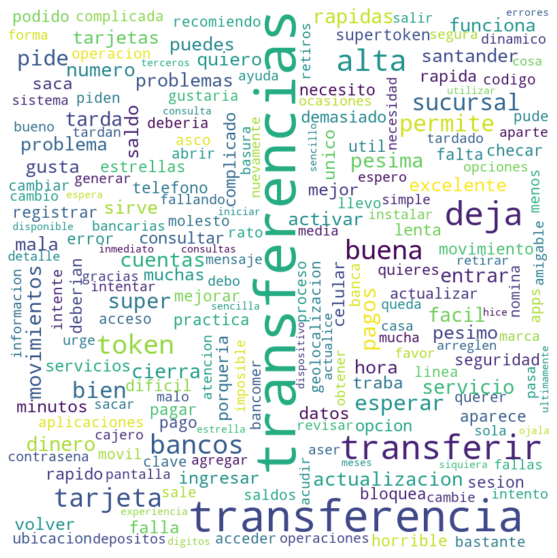

In [17]:
transferencias = data[data["topic"]=="transferencias"]
token = data[data["topic"]=="token"]
transferencias = transferencias.reset_index()
token = token.reset_index()

#Nube de palabras del topico Tranferencias
nube_palabras(transferencias)

Top 10 de palabras mas usadas [('token', 2378), ('super', 1017), ('sucursal', 738), ('activar', 696), ('supertoken', 545), ('deja', 370), ('transferencias', 336), ('pide', 316), ('pesima', 209), ('obtener', 208)] 



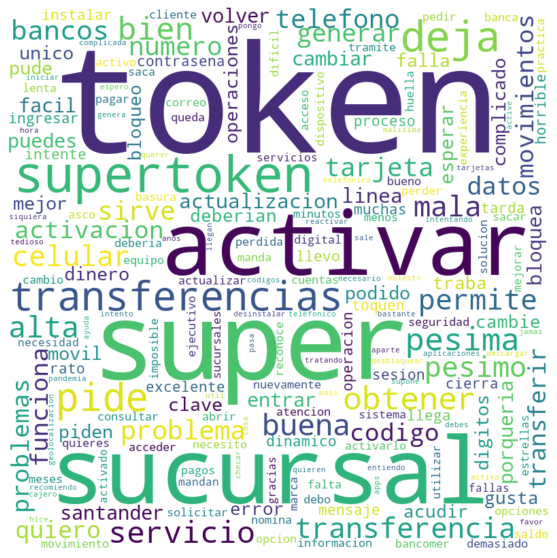

In [18]:
#Nube de palabras del topico Token
nube_palabras(token)

In [95]:
# Sepación de datos en conjunto de variables independientes (X) y en variable objetivo (y)

y = np.array(data["topic"])
y[y=="transferencias"]="0"
y[y=="token"]="1"
X = data[["content_clean"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

Ahora procedemos a tranformar nuestros datos de texto a una matriz numerica usando el enfoque de BoW - TF-IDF

In [96]:
def text_transformer(X_train, X_test, vectorizer):
  # """ Función para crear word embeddings (TF-IDF y BoW)
  # Args:
  # X_train pandas dataframe
  # X_test pandas dataframe
  # varToVector string que contiene nombre de variable de texto
  # vectorizer objeto para crear un word embedding de tipo TF-IDF y BoW
  # """
  # Define método para convertir de texto a matrix numérica
  vectorizer_ = vectorizer
  vectorizer_.fit(X_train)
  X_train = vectorizer_.transform(X_train)
  X_test = vectorizer_.transform(X_test)
  return X_train, X_test 

In [97]:
# Crea un word embedding de tipo TF-IDF con el objeto de Sklearn llamado TfidfVectorizer
# TfidfVectorizer(Por optimizar)
X_train_TFID, X_test_TFID = text_transformer(X_train["content_clean"], X_test["content_clean"], TfidfVectorizer(min_df=300)) 

# Convierte el resultado anterior en una matriz poco densa que pueda ser usada para entrenar un modelo
X_train_TFID = pd.DataFrame(X_train_TFID.toarray())
X_test_TFID = pd.DataFrame(X_test_TFID.toarray())

In [98]:
# Revisamos la dimension de la matriz
print(X_test_TFID.shape)
print(X_train_TFID.shape)

(2240, 17)
(5226, 17)


## **D) Entrenamiento de modelos (al menos 3)**

En esta etapa procederemos a entrenar distintos modelos de aprendizaje de máquina. Dado que tenemos un problema de clasificación, no existía un desbalance muy grande entre ambas clases en la variable objetivo, por lo cual si usaramos la métrica accuracy tendríamos buenos resultados. Sin embargo, para fines de este ejercicio decidí tomar la metrica AUC. 

### Modelo 1: Regresión Logística

Buscar el mejor parametro de penalización C para el modelo de regresión Logística

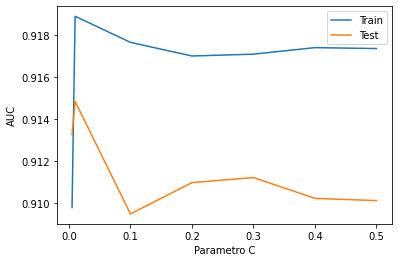

In [99]:
lista_c = []
lista_auc_train = []
lista_auc_test = []

for c in [0.005,0.01,0.1,0.2,0.3,0.4,0.5]:
  modelo_reg_log = LogisticRegression(random_state=1, solver='lbfgs',penalty="l2",C=c)
  modelo_reg_log.fit(X_train_TFID, y_train)
  #print("C = ",c)
  lista_c.append(c)
  #print("Score",modelo_reg_log.score(X_test_TFID,y_test))

  try:
    a = roc_auc_score(modelo_reg_log.predict(X_train_TFID), y_train)
    lista_auc_train.append(a)
  except ValueError:
    a=0
    lista_auc_train.append(0)
    #print("Train AUC",a)

  try:
    a = roc_auc_score(modelo_reg_log.predict(X_test_TFID), y_test)
    lista_auc_test.append(a)
    #print("Test AUC",a)
  except ValueError:
    a=0
    lista_auc_test.append(0)
    #print("Test AUC",a)


# Obtener los resultados al variar el hiper-parametro
resultados = pd.DataFrame({"C":lista_c,"AUC_Train":lista_auc_train,"AUC_Test":lista_auc_test})
resultados

# import matplotlib.pyplot as plt
# plt.plot(resultados["C"], resultados["AUC_Train"])
# plt.plot(resultados["C"], resultados["AUC_Test"])
# plt.xlabel("Parametro C")
# plt.ylabel("AUC")
# plt.show() 

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(resultados["C"], resultados["AUC_Train"],label='Train')
ax.plot(resultados["C"], resultados["AUC_Test"],label='Test')
ax.set_xlabel("Parametro C")
ax.set_ylabel("AUC")
plt.legend()
plt.show()

# Parametro ganador C = 0.01

### Modelo 2: Bayes Ingenuo
Dado que este modelo no tiene hiperparámetros, busqué el mejor parámetro var_smoothing que recibe skleanr

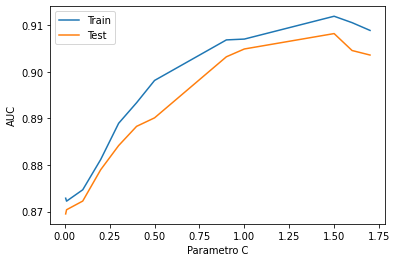

In [100]:
lista_c = []
lista_auc_train = []
lista_auc_test = []

for c in [0.005,0.01,0.1,0.2,0.3,0.4,0.5,0.9,1,1.5,1.6,1.7]:
  from sklearn.naive_bayes import GaussianNB
  modelo_nb = GaussianNB(var_smoothing=c)
  modelo_nb.fit(X_train_TFID, y_train)
  # print(modelo_nb.score(X_test_TFID,y_test))
  # print(roc_auc_score(modelo_nb.predict(X_test_TFID), y_test))

  lista_c.append(c)

  try:
    a = roc_auc_score(modelo_nb.predict(X_train_TFID), y_train)
    lista_auc_train.append(a)
  except ValueError:
    a=0
    lista_auc_train.append(0)
    #print("Train AUC",a)

  try:
    a = roc_auc_score(modelo_nb.predict(X_test_TFID), y_test)
    lista_auc_test.append(a)
    #print("Test AUC",a)
  except ValueError:
    a=0
    lista_auc_test.append(0)
    #print("Test AUC",a)


# Obtener los resultados al variar el hiper-parametro
resultados = pd.DataFrame({"C":lista_c,"AUC_Train":lista_auc_train,"AUC_Test":lista_auc_test})
resultados

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(resultados["C"], resultados["AUC_Train"],label='Train')
ax.plot(resultados["C"], resultados["AUC_Test"],label='Test')
ax.set_xlabel("Parametro C")
ax.set_ylabel("AUC")
plt.legend()
plt.show()

#Visualmente podemos ver que la mejor C = 1.5

### Modelo 3: Random Forest
Este modelo tiene varios hiperparámetros, entre ellos el número de árboles, el cual validaremos para distintos valores de 1 a 500.

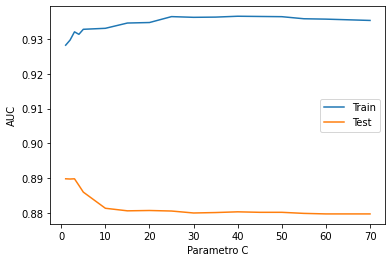

In [101]:
lista_c = []
lista_auc_train = []
lista_auc_test = []

for c in [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,70]:

  from sklearn.ensemble import RandomForestClassifier
  modelo_rf = RandomForestClassifier(n_estimators=c,random_state=2)
  modelo_rf.fit(X_train_TFID, y_train)
  # print(modelo_rf.score(X_test_TFID,y_test))
  # print(roc_auc_score(modelo_rf.predict(X_test_TFID), y_test))
  lista_c.append(c)

  try:
    a = roc_auc_score(modelo_rf.predict(X_train_TFID), y_train)
    lista_auc_train.append(a)
  except ValueError:
    a=0
    lista_auc_train.append(0)
    #print("Train AUC",a)

  try:
    a = roc_auc_score(modelo_rf.predict(X_test_TFID), y_test)
    lista_auc_test.append(a)
    #print("Test AUC",a)
  except ValueError:
    a=0
    lista_auc_test.append(0)
    #print("Test AUC",a)


# Obtener los resultados al variar el hiper-parametro
resultados = pd.DataFrame({"C":lista_c,"AUC_Train":lista_auc_train,"AUC_Test":lista_auc_test})
resultados

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(resultados["C"], resultados["AUC_Train"],label='Train')
ax.plot(resultados["C"], resultados["AUC_Test"],label='Test')
ax.set_xlabel("Parametro C")
ax.set_ylabel("AUC")
plt.legend()
plt.show()

#Visualmente podemos ver que la mejor C = 2

## **E) Evaluación de los modelos**

En la siguiente tabla podemos observar las metricas de los modelos.

In [163]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

lista_modelos = ["Regresión Logística","Naive Bayes","Random Forest"]
lista_auc_test = []
lista_accuracy_test = []
lista_f1_test = []
lista_recall_test = []

# MODELO 1: REGRESION LOGISTICA CON PARAMETRO DE PENALIZACION C = 0.01
modelo_reg_log = LogisticRegression(random_state=1, solver='lbfgs',penalty="l2",C=0.01)
modelo_reg_log.fit(X_train_TFID, y_train)
y_pred = modelo_reg_log.predict(X_test_TFID)
lista_auc_test.append(roc_auc_score(y_pred, y_test))
lista_accuracy_test.append(accuracy_score(y_pred, y_test))
lista_f1_test.append(f1_score(y_pred, y_test,pos_label="1"))
lista_recall_test.append(recall_score(y_pred, y_test, average='macro'))

# MODELO 2: BAYES INGENUO CON PARAMETRO VAR_SMOOTHING = 1.5
from sklearn.naive_bayes import GaussianNB
modelo_nb = GaussianNB(var_smoothing=1.5)
modelo_nb.fit(X_train_TFID, y_train)
y_pred = modelo_nb.predict(X_test_TFID)
lista_auc_test.append(roc_auc_score(y_pred, y_test))
lista_accuracy_test.append(accuracy_score(y_pred, y_test))
lista_f1_test.append(f1_score(y_pred, y_test,pos_label="1"))
lista_recall_test.append(recall_score(y_pred, y_test, average='macro'))

# MODELO 3: BOSQUE ALEATORIO CON  2 ARBOLES
from sklearn.ensemble import RandomForestClassifier
modelo_rf = RandomForestClassifier(n_estimators=c,random_state=2)
modelo_rf.fit(X_train_TFID, y_train)
y_pred = modelo_rf.predict(X_test_TFID)
lista_auc_test.append(roc_auc_score(y_pred, y_test))
lista_accuracy_test.append(accuracy_score(y_pred, y_test))
lista_f1_test.append(f1_score(y_pred, y_test,pos_label="1"))
lista_recall_test.append(recall_score(y_pred, y_test, average='macro'))



metricas = pd.DataFrame({"Modelo":lista_modelos,"Metrica AUC":lista_auc_test,"Metrica Accuracy":lista_accuracy_test,"Metrica F1":lista_f1_test,"Metrica Recall":lista_recall_test})
metricas

,Modelo,Metrica AUC,Metrica Accuracy,Metrica F1,Metrica Recall
0,Regresión Logística,0.914831,0.914732,0.880100,0.914831
1,Naive Bayes,0.908175,0.910268,0.874922,0.908175
2,Random Forest,0.879779,0.890625,0.857309,0.879779


De esta tabla podemos ver que el mejor modelo es la Regresión Logística, con todas las métricas superiores a los demás modelos en el conjunto de prueba.
Considero que es un buen modelo lo suficientemente robusto como para acertar en las predicciones. Algo interesante es que el modelo de Bosque Aleatorio tiene un desempeño incluso inferiro a Bayes Ingenuo, algo muy inesperado. ya que el modelo de Bayes es relativamente sencillo.

Posteriormente podemos usar bootstrap para hacer una comparación de las metricas de cada modelo.

In [276]:
lista_auc_test_lr = []
lista_auc_test_nb = []
lista_auc_test_rf = []


for k in range(1,101):
  # Sepación de datos en conjunto de variables independientes (X) y en variable objetivo (y)
  #y = np.array(data["topic"])
  y = pd.DataFrame(data["topic"].copy())
  y[y=="transferencias"]="0"
  y[y=="token"]="1"
  X = data[["content_clean"]]

  #Tomar la muestra aleatoria con reemplazo de tamaño igual a 70% de len(X)
  X_boot_train = X.sample(n=int(len(X)*0.7), replace=True,random_state=k).copy()
  y_boot_train = y.sample(n=int(len(X)*0.7), replace=True,random_state=k).copy()

  #Tomar el conjuto de prueba a partir de un muestreo sobre los datos que no vivan en el conjunto de entrenamiento
  X_boot_test = X.loc[~X.index.isin(X_boot_train.index)].sample(n=int(len(X)*0.3), replace=False,random_state=k).copy()
  y_boot_test = y.loc[~y.index.isin(y_boot_train.index)].sample(n=int(len(X)*0.3), replace=False,random_state=k).copy()

  # Crea un word embedding de tipo TF-IDF con el objeto de Sklearn llamado TfidfVectorizer
  X_train_TFID, X_test_TFID = text_transformer(X_boot_train["content_clean"], X_boot_test["content_clean"], TfidfVectorizer(min_df=300)) 

  # Convertir el resultado anterior en una matriz poco densa que pueda ser usada para entrenar un modelo
  X_train_TFID = pd.DataFrame(X_train_TFID.toarray())
  X_test_TFID = pd.DataFrame(X_test_TFID.toarray())

  #Definimos los conjuntos de Y en train  y test
  y_train = np.array(y_boot_train["topic"])
  y_test = np.array(y_boot_test["topic"])

  # MODELO 1: REGRESION LOGISTICA CON PARAMETRO DE PENALIZACION C = 0.01
  modelo_reg_log = LogisticRegression(random_state=1, solver='lbfgs',penalty="l2",C=0.01)
  modelo_reg_log.fit(X_train_TFID, y_train)
  y_pred = modelo_reg_log.predict(X_test_TFID)
  lista_auc_test_lr.append(roc_auc_score(y_pred, y_test))

  # MODELO 2: BAYES INGENUO CON PARAMETRO VAR_SMOOTHING = 1.5
  from sklearn.naive_bayes import GaussianNB
  modelo_nb = GaussianNB(var_smoothing=1.5)
  modelo_nb.fit(X_train_TFID, y_train)
  y_pred = modelo_nb.predict(X_test_TFID)
  lista_auc_test_nb.append(roc_auc_score(y_pred, y_test))

  # MODELO 3: BOSQUE ALEATORIO CON  2 ARBOLES
  from sklearn.ensemble import RandomForestClassifier
  modelo_rf = RandomForestClassifier(n_estimators=c,random_state=2)
  modelo_rf.fit(X_train_TFID, y_train)
  y_pred = modelo_rf.predict(X_test_TFID)
  lista_auc_test_rf.append(roc_auc_score(y_pred, y_test))


[Text(0, 0, 'Regresion_Logistica'),
 Text(0, 0, 'Naive_Bayes'),
 Text(0, 0, 'Random_Forest')]

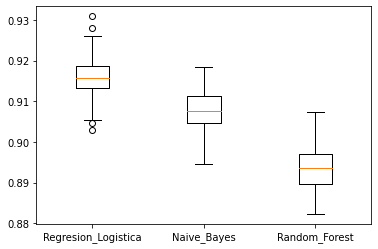

In [277]:
resultados_boot = pd.DataFrame({"Regresion_Logistica":lista_auc_test_lr,"Naive_Bayes":lista_auc_test_nb,"Random_Forest":lista_auc_test_rf})
my_dict = {"Regresion_Logistica":lista_auc_test_lr,"Naive_Bayes":lista_auc_test_nb,"Random_Forest":lista_auc_test_rf}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

Después de haber realziado para 100 muestras bootstrap, obtenermos los gráficos de caja y bigotes, y mi desición es tomar el modelo de Regresion Logistica, ya que es en promedio el que obtiene mejores resultado en la métrica AUC en el conjuto test. Además de que no se aprecia una gran diferencia en la varianza de los 3 modelos.